In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn import cluster
# from sklearn import metrics
# from scipy import stats
# from sklearn.metrics import silhouette_score
# from sklearn import decomposition
from scipy.cluster import hierarchy
# from scipy import stats
# from random import sample 
# import math
import os
# from sklearn import decomposition
# import glob
# from sklearn import linear_model
from scipy.stats import     zscore

: 

In [2]:
# set output directory
os.chdir("/ix/djishnu/Aaron_F/morgan_satarupa_RNAseq/AM_Results/20250117/DEG_analysis/IL33")

In [3]:
# load data
data = pd.read_csv('/ix/djishnu/Aaron_F/morgan_satarupa_RNAseq/AM_Results/20250117/Sample_compare/IL33/20250117_deseq2_normalized_RNAseq_counts_exp1_removedSamples.csv', index_col=0)
print(data.shape)

# load degs
degs = np.loadtxt("/ix/djishnu/Aaron_F/morgan_satarupa_RNAseq/Data/gata2_info/2025_KEGG_GATA2enrichment_metabolic_list.csv", dtype=str)
print(len(degs))


(25239, 14)
51


In [4]:
# make sure degs are in current data
print(len(degs))
deg_subset = [deg for deg in degs if deg in data.index]

print(len(deg_subset))

51
51


In [5]:
# make data coef specifc
deg_data = data.loc[deg_subset]
deg_data

,Unstim_GATA2_0_Exp1_Rep3,IL33_WT_24_Exp1_Rep1,IL33_WT_24_Exp1_Rep2,IL33_GATA2_24_Exp1_Rep3,IL33_GATA2_24_Exp1_Rep4,IL33_GATA2_24_Exp1_Rep5,IL33_GATA2_24_Exp1_Rep6,Unstim_WT_0_Exp1_Rep1,Unstim_WT_0_Exp1_Rep2,Unstim_WT_0_Exp1_Rep3,Unstim_WT_0_Exp1_Rep4,Unstim_WT_0_Exp1_Rep5,Unstim_GATA2_0_Exp1_Rep1,Unstim_GATA2_0_Exp1_Rep2
Haao,211.927533,205.305140,151.995068,104.406200,69.251209,113.982755,104.525881,212.470397,174.435729,190.433553,180.344234,148.608949,159.514359,166.951420
Car4,19888.490711,13877.173967,23889.199563,37617.553960,38267.536796,35794.222972,33139.588656,17835.395224,11896.683636,21760.035763,16099.609648,17859.299041,21165.081747,20868.927546
Gstt3,532.846369,502.361692,414.619458,306.693213,295.169086,413.490634,350.698984,583.283750,528.314911,534.414881,505.274795,511.875270,541.666408,506.283576
Naglu,3040.857345,3770.892193,4173.130419,3078.677831,3245.724686,3370.979365,3310.637482,3159.588292,3387.725472,3028.922864,3103.164585,3249.970881,3167.255704,3003.768238
Sult2b1,119.890433,145.348772,95.237416,44.372635,70.386474,76.392698,75.219559,217.317630,186.955040,205.016303,172.570776,137.924646,160.367377,135.732862
Pld3,33133.356016,35945.659644,39711.116578,29875.834210,32196.135740,32253.482056,32021.064042,37220.289386,38158.858977,34763.559323,36072.733607,37953.560125,36779.575596,34837.196383
Man1a,368.148400,769.440060,856.174752,1485.178199,1613.212584,1011.293809,1088.241415,330.419742,327.171319,342.265710,401.110452,368.122822,429.068036,404.483929
Srm,1468.960557,1975.834864,2605.080031,2854.204500,2927.850285,3121.187368,2821.221909,1352.378113,1266.119621,1272.988255,1214.214199,1241.321813,1330.708025,1338.326020
Odc1,2038.137360,2205.667609,2856.160492,3030.389963,3497.753675,3437.671402,3210.995988,1939.701225,1857.865706,1801.398475,1821.321298,1801.762099,1717.125164,2008.846359
Galns,3096.564011,2615.369459,2414.605199,1847.989745,1984.444474,2086.854491,2165.737179,3545.751218,3467.849061,3334.302795,3309.161232,3524.848873,3719.158327,3581.990230


In [6]:
# Sort columns alphanumerically
sorted_columns = sorted(deg_data.columns)
print(sorted_columns)

['IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6', 'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5']


In [7]:
# resort based on prefered order (can use print statement above for ease)
# sorted_columns = ['Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5',
#                   'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3',
#                   'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2',
#                   'IL33_GATA2_24_Exp1_Rep1', 'IL33_GATA2_24_Exp1_Rep2', 'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6']

# sorted_columns = ['Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5',
# 'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3', 'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2',
# 'IL33_GATA2_24_Exp1_Rep1', 'IL33_GATA2_24_Exp1_Rep2', 'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6']

# WT vs GATA2, all samples
sorted_columns = [
    'Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5',
    'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2',
    'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3',
    'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6'
]

# sorted_columns = [
#     'Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5',
#     'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3',
#     'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2',
#     'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6'
# ]

# unstim_WT vs Unstim_GATA2:
# sorted_columns = [
#     'Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5',
#     'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3',
# ]

# IL33_WT vs IL33_GATA2:
# sorted_columns = [
#     'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2',
#     'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6'
# ]

# sorted_columns = ['Unstim_WT_0_Exp2_Rep1', 'Unstim_WT_0_Exp2_Rep2', 'Unstim_WT_0_Exp2_Rep3', 'Unstim_WT_0_Exp2_Rep4', 'Unstim_WT_0_Exp2_Rep5',
#                   'Unstim_GATA2_0_Exp2_Rep1', 'Unstim_GATA2_0_Exp2_Rep2', 'Unstim_GATA2_0_Exp2_Rep3',
#                   'Staph_WT_24_Exp2_Rep1', 'Staph_WT_24_Exp2_Rep2', 'Staph_WT_24_Exp2_Rep3', 'Staph_WT_24_Exp2_Rep4', 'Staph_WT_24_Exp2_Rep5', 'Staph_WT_24_Exp2_Rep6',
#                   'Staph_GATA2_24_Exp2_Rep1', 'Staph_GATA2_24_Exp2_Rep3']

# # Unstim_WT vs Unstim_GATA2:
# sorted_columns = [
#     'Unstim_WT_0_Exp2_Rep1', 'Unstim_WT_0_Exp2_Rep2', 'Unstim_WT_0_Exp2_Rep3', 'Unstim_WT_0_Exp2_Rep4',
#     'Unstim_GATA2_0_Exp2_Rep1', 'Unstim_GATA2_0_Exp2_Rep2', 'Unstim_GATA2_0_Exp2_Rep3'
# ]

# Staph_WT vs Staph_GATA2:
# sorted_columns = [
#     'Staph_WT_24_Exp2_Rep1', 'Staph_WT_24_Exp2_Rep2', 'Staph_WT_24_Exp2_Rep3', 'Staph_WT_24_Exp2_Rep4', 'Staph_WT_24_Exp2_Rep5',
#     'Staph_GATA2_24_Exp2_Rep1', 'Staph_GATA2_24_Exp2_Rep3'
# ]

# sorted_columns = ['Unstim_WT_0_Exp2_Rep1', 'Unstim_WT_0_Exp2_Rep2', 'Unstim_WT_0_Exp2_Rep3', 'Unstim_WT_0_Exp2_Rep4', 'Unstim_WT_0_Exp2_Rep5',
#                   'Staph_WT_24_Exp2_Rep1', 'Staph_WT_24_Exp2_Rep2', 'Staph_WT_24_Exp2_Rep3', 'Staph_WT_24_Exp2_Rep4', 'Staph_WT_24_Exp2_Rep5', 'Staph_WT_24_Exp2_Rep6',
#                   'Unstim_GATA2_0_Exp2_Rep1', 'Unstim_GATA2_0_Exp2_Rep2', 'Unstim_GATA2_0_Exp2_Rep3',
#                   'Staph_GATA2_24_Exp2_Rep1', 'Staph_GATA2_24_Exp2_Rep3']

# sorted_columns = ['Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5',
#                   'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3',
#                   'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2',
#                   'IL33_GATA2_24_Exp1_Rep1', 'IL33_GATA2_24_Exp1_Rep2', 'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6',
#                   'Unstim_WT_0_Exp2_Rep1', 'Unstim_WT_0_Exp2_Rep2', 'Unstim_WT_0_Exp2_Rep3', 'Unstim_WT_0_Exp2_Rep4', 'Unstim_WT_0_Exp2_Rep5',
#                   'Unstim_GATA2_0_Exp2_Rep1', 'Unstim_GATA2_0_Exp2_Rep2', 'Unstim_GATA2_0_Exp2_Rep3',
#                   'Staph_WT_24_Exp2_Rep1', 'Staph_WT_24_Exp2_Rep2', 'Staph_WT_24_Exp2_Rep3', 'Staph_WT_24_Exp2_Rep4', 'Staph_WT_24_Exp2_Rep5', 'Staph_WT_24_Exp2_Rep6',
#                   'Staph_GATA2_24_Exp2_Rep1', 'Staph_GATA2_24_Exp2_Rep3']

In [8]:
# average replicates:
df = deg_data.copy()
# Extract replicate group names by removing the "RepX" part
df_grouped = df.T
df_grouped.index = df_grouped.index.str.rsplit("_", n=1).str[0]  # Remove last part (RepX)

# Compute the mean for each replicate group
df_avg = df_grouped.groupby(df_grouped.index).mean()

# Reset index and transpose back to original format
df_avg = df_avg.T

df_avg

,IL33_GATA2_24_Exp1,IL33_WT_24_Exp1,Unstim_GATA2_0_Exp1,Unstim_WT_0_Exp1
Haao,98.041511,178.650104,179.464438,181.258572
Car4,36204.725596,18883.186765,20640.833335,17090.204663
Gstt3,341.512979,458.490575,526.932117,532.632721
Naglu,3251.504841,3972.011306,3070.627096,3185.874419
Sult2b1,66.592842,120.293094,138.663557,183.956879
Pld3,31586.629012,37828.388111,34916.709332,36833.800284
Man1a,1299.481502,812.807406,400.566789,353.818009
Srm,2931.116016,2290.457448,1379.331534,1269.404400
Odc1,3294.202757,2530.914051,1921.369628,1844.409761
Galns,2021.256472,2514.987329,3465.904189,3436.382636


In [9]:
df_avg.columns = ["GATA2 IL33", "WT IL33", "GATA2 PBS", "WT PBS"]

In [10]:
df_avg = df_avg.iloc[:,[3, 2, 1, 0]]
df_avg

,WT PBS,GATA2 PBS,WT IL33,GATA2 IL33
Haao,181.258572,179.464438,178.650104,98.041511
Car4,17090.204663,20640.833335,18883.186765,36204.725596
Gstt3,532.632721,526.932117,458.490575,341.512979
Naglu,3185.874419,3070.627096,3972.011306,3251.504841
Sult2b1,183.956879,138.663557,120.293094,66.592842
Pld3,36833.800284,34916.709332,37828.388111,31586.629012
Man1a,353.818009,400.566789,812.807406,1299.481502
Srm,1269.404400,1379.331534,2290.457448,2931.116016
Odc1,1844.409761,1921.369628,2530.914051,3294.202757
Galns,3436.382636,3465.904189,2514.987329,2021.256472


In [11]:
# get rid of Cre related genes Lyz1 and Lyz2
df_avg = df_avg.drop(["Lyz1", "Lyz2"])
df_avg

KeyError: "['Lyz1', 'Lyz2'] not found in axis"

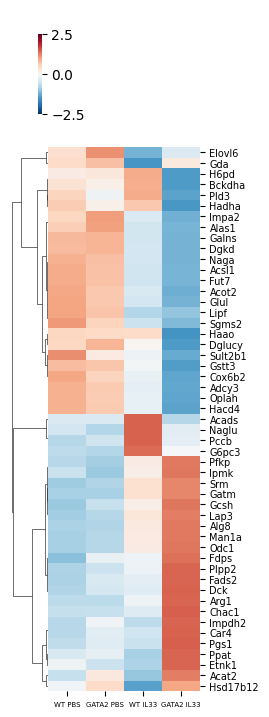

In [16]:
# heatmap

# # Set up heatmap with adjusted figure size
# fig, ax = plt.subplots(figsize=(0.5, 10))  # Adjust width (first value) and height (second value)

# Create heatmap with smaller column width
c = sns.color_palette("RdBu_r", as_cmap=True)
cluster_heatmap = sns.clustermap(df_avg, metric='correlation', method='complete', cmap=c,
                                 z_score=0, col_cluster=False, row_cluster=True,
                                 vmin=-2.5, vmax=2.5, yticklabels=True,
                                 figsize=(3, 8))  # Adjust figure size

# # Tighten layout
# cluster_heatmap.fig.tight_layout()
cluster_heatmap.cax.set_position([0.1, 0.85, 0.1, 0.1])
cluster_heatmap.cax.set_aspect(5)
cluster_heatmap.ax_heatmap.set_yticklabels(
    cluster_heatmap.ax_heatmap.get_yticklabels(), fontsize=7
)
cluster_heatmap.ax_heatmap.set_xticklabels(
    cluster_heatmap.ax_heatmap.get_xticklabels(), rotation=0, ha="center",
    fontsize=5
)
# Save and show the heatmap
plt.savefig('KeggMetabolicPathGenes_avgExp_heatmap.pdf', format='pdf')
plt.show()
# c = sns.color_palette("RdBu_r", as_cmap=True)
# cluster_heatmap = sns.clustermap(df_avg, metric='correlation',method='complete', cmap=c,z_score=0, 
#                                  col_cluster=False, row_cluster=True,vmin=-2.5, vmax=2.5, yticklabels=False)
# # for label in cluster_heatmap.ax_heatmap.get_yticklabels():
# #     label.set_rotation(0)
# #     label.set_fontsize(3)
# # cluster_heatmap.cax.set_position([0.1, 0.85, 0.03, 0.1])
# # cluster_heatmap.cax.set_aspect(5)
# # cluster_heatmap.fig.tight_layout()
# plt.savefig('WT_vs_GATA2_DEGs_avgExp_heatmap.pdf',format='pdf')
# plt.show()


In [8]:
palette1 = ['hotpink', 'crimson', 'maroon', 'tomato', 'orange', 'gold', 'mediumturquoise', 
           'teal', 'skyblue', 'deepskyblue', 'royalblue', 'mediumblue', 'slateblue', 'indigo']
network_pal = sns.color_palette(palette1)


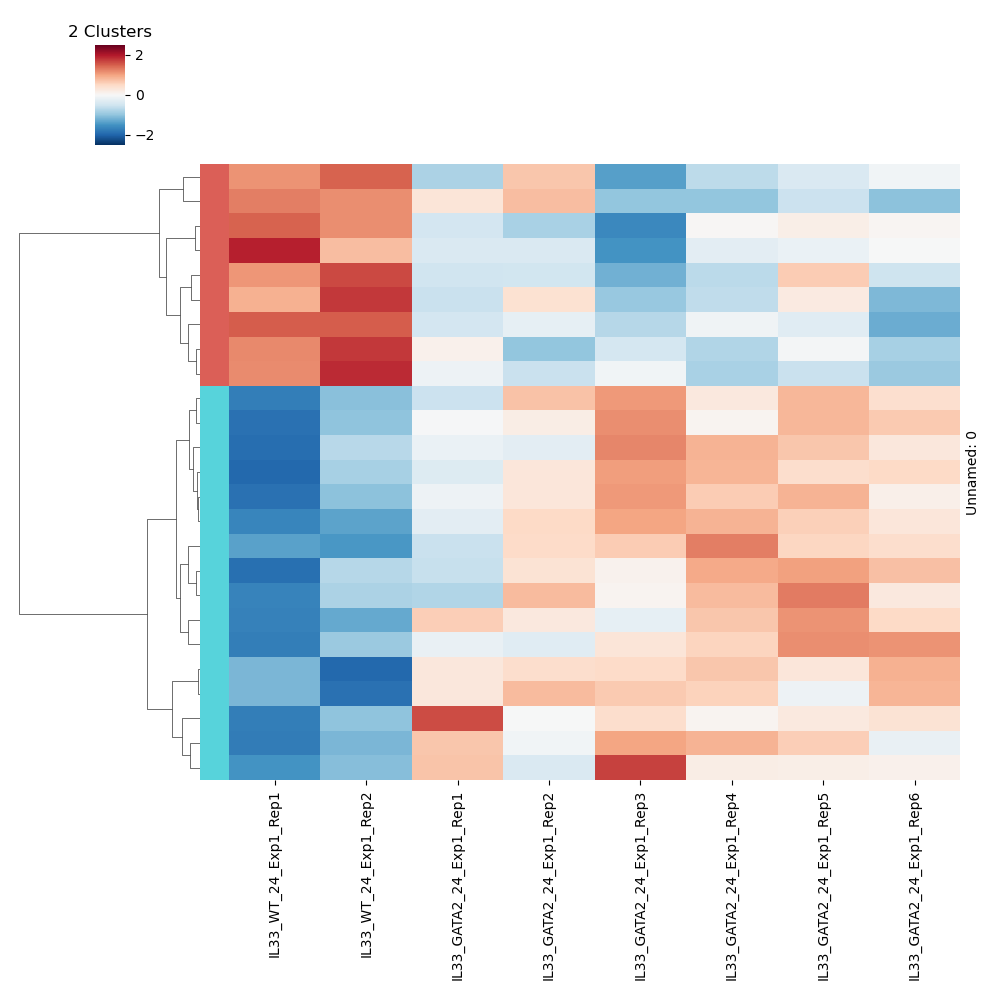

In [9]:
# RNAseq no Z-score
for k in [2]:
    link = cluster_heatmap.dendrogram_row.linkage
    dend = cluster_heatmap.dendrogram_row.dendrogram
    clus_assign = hierarchy.fcluster(link, k, criterion='maxclust')
    all_ind = np.asarray(dend['ivl'])
    network_pal = sns.color_palette("hls", k)
    # network_pal = sns.color_palette("tab10", k)
    ord_ind = cluster_heatmap.dendrogram_row.reordered_ind
    clus_colors = np.ones((len(ord_ind),3))
    
    for i in range(len(ord_ind)):
        clus_colors[i,:] = network_pal[clus_assign[i] - 1]
    
    # c = sns.color_palette("RdBu", 7)
    # c_rev = c.reverse()
    c = sns.color_palette("RdBu_r", as_cmap=True)
    # temp = sns.clustermap(rna_df, metric='correlation',method='complete', z_score=0, vmin=-2.5, vmax=2.5,
    #                       cmap = c, row_colors=clus_colors, col_cluster=False, figsize=(5,9),cbar_pos=None)
    # temp = sns.clustermap(avg_data, metric='correlation',method='complete',z_score=0, vmin=-2.5, 
    #                       vmax=2.5, col_cluster=False, cmap = c, row_colors=clus_colors, 
    #                       figsize=(12,6))
    temp = sns.clustermap(deg_data.loc[:, sorted_columns], metric='correlation',method='complete', cmap=c,z_score=0, 
                                 col_cluster=False,vmin=-2.5, vmax=2.5, yticklabels=False, row_colors=clus_colors)
    temp.cax.set_position([0.1, 0.85, 0.03, 0.1])
    s = str(k) + ' Clusters'
    fig_title = 'CEBPB_target_and_degs_intersect_heatmap' + str(k) + '_clusters'
    plt.title(s)
    # plt.savefig(fig_title + '.pdf', format='pdf')
    plt.show()

# # save cluster genes
# # save one cluster file
# list_of_cluster_dfs = []
# for i in range(1, 10):
#     clus_df = pd.DataFrame({"gene": rna_df.index[np.where(clus_assign == i)[0]],
#                             "cluster": i, "cluster_color": mcolors.rgb2hex(network_pal[i-1])})
#     list_of_cluster_dfs.append(clus_df)
# final_clus_df = pd.concat(list_of_cluster_dfs)
# final_clus_df.to_csv("/ix/djishnu/Aaron_F/Cleaned_Proteomics_Aaron/20240621/Heatmaps/Results/RNA_9_clusters.csv", index=False)


In [10]:
#### output cluster order and dictionary of gene and cluster assignment
clus_ordered_gs = deg_data.iloc[ord_ind,:].index.tolist()
clus_ordered_nums = clus_assign[ord_ind]
clus_ordered_df = pd.DataFrame({"gene": clus_ordered_gs, "clus_num": clus_ordered_nums})

# save
clus_ordered_df.to_csv('WT_vs_GATA2_deg_pvalue_0.05_heatmap_order.csv', index=False)

In [14]:
clus_ordered_df

,gene,clus_num
0,Scd2,1
1,Aldh1l1,1
2,Bdh1,1
3,Derl3,1
4,Txndc5,1
...,...,...
517,Lrig3,11
518,Usp49,11
519,Hes7,11
520,Prickle2,11
